### Plot the SA fit and spectra together

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii, fits
from matplotlib.gridspec import GridSpec
from scipy import interpolate
import pandas as pd
%matplotlib inline

In [6]:
# load atmospheric transmission file
hdu = fits.open('/Users/jpw/idl/Spextool/data/atran75000.fits')
tdata = hdu[0].data
atrans = interpolate.interp1d(tdata[0,:], tdata[1,:])

In [18]:
# define the input file parameters
path = '/Users/jpw/NG/iSHELL/adwin/191008/reduced/'
source = 'DRTau'
PA1 = 90

# load the spectrum
hdu1 = fits.open(path+'c'+source+'_PA'+str(PA1)+'.fits')
data1 = hdu1[0].data
hd1 = hdu1[0].header
hdu1.close()

# read in the SA fits
SA = pd.read_csv(path+source+'_PA'+str(PA1)+'_SA.csv', skipinitialspace=True)
SA_comb = 0.5 * (SA['off_pos'] - SA['off_neg'])
SA_comb -= np.nanmedian(SA_comb)
SA_comb_err = 0.5 * np.sqrt(SA['err_pos']**2 + SA['err_neg']**2)

(-0.05, 0.05)

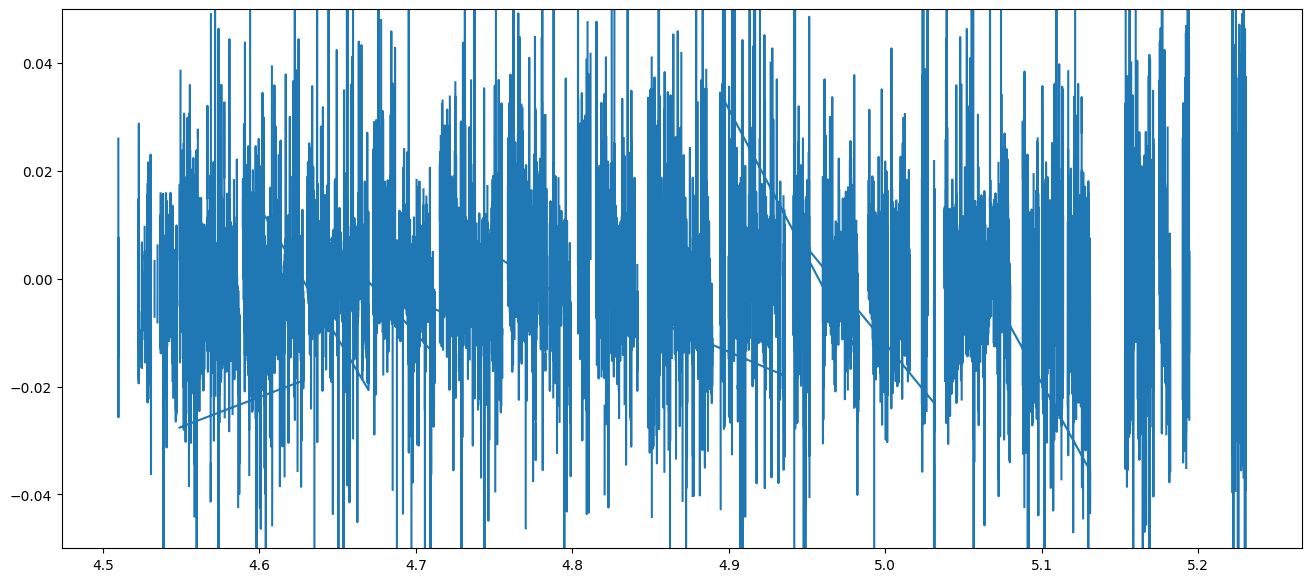

In [21]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
ax.plot(SA['wavelength'], SA_comb)
ax.set_ylim(-0.05, 0.05)

In [24]:
wl = SA['wavelength']
np.argsort(wl)

0        29925
1        29926
2        29927
3        29928
4        29929
         ...  
31915     1964
31916     1963
31917     1993
31918     1976
31919     1992
Name: wavelength, Length: 31920, dtype: int64

In [25]:
wl

0        5.189971
1        5.189995
2        5.190020
3        5.190043
4        5.190067
           ...   
31915    4.547256
31916    4.547274
31917    4.547291
31918    4.547309
31919    4.547327
Name: wavelength, Length: 31920, dtype: float64

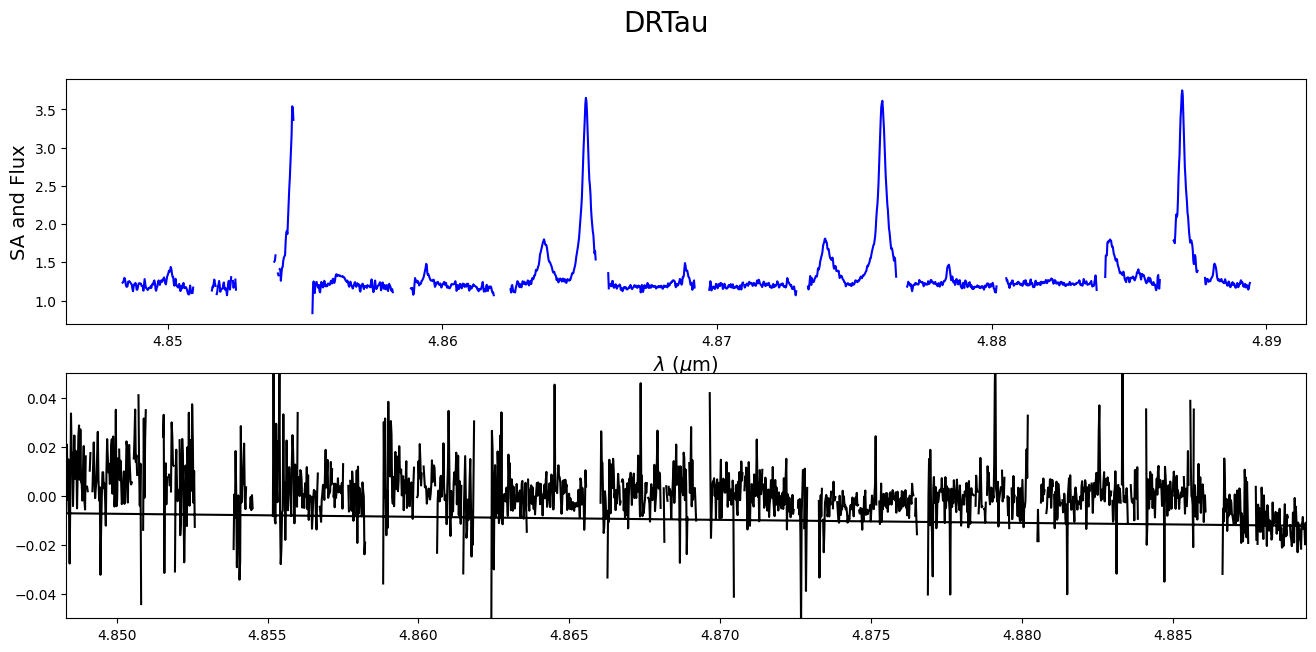

In [27]:
# plot just one order
fig = plt.figure(figsize=(16, 7))
order = 7
wl1 = data1[order, 0, :]
flux1 = data1[order, 1, :]

ax1 = fig.add_subplot(211)
ax1.plot(wl1, flux1, color='b')
ax1.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
ax1.set_ylabel(r'SA and Flux', fontsize=14)

ax2 = fig.add_subplot(212)
ax2.plot(SA['wavelength'], SA_comb, color='k')
ax2.set_xlim(wl1.min(), wl1.max())
ax2.set_ylim(-0.05, 0.05)

#axr = ax.twinx()
#axr.plot(wl1, 100*atrans(wl1), '-', color='gray', alpha=0.5)
#axr.set_ylabel(r'Transmission (%)', fontsize=14)
#axr.set_ylim(-400,100)
#axr.set_yticks([-400,-300,-200,-100,0,100])
#axr.set_yticklabels(['','','','','0','100'])

fig.suptitle(source, fontsize=20)
fig.savefig(source+'_SA.pdf', dpi=300)